In [1]:
import neat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import networkx as nx
from reservoirpy import nodes, datasets

import reservoirpy as rpy
rpy.verbosity(0)

# Assuming the helper functions from the provided scripts are imported correctly:
import hierarchical_genome_mutations_operations as hgmo
import evolution_step_functions as esf
import genome_analysis as ga
import genome_transcription as gt
import helper_functions as hf
import hierarchical_genomes as hg

In [14]:
# Define other required parameters
population_size = 50
n_generations = 50
genome_length = 100
n_timesteps = 2000

# Initialize your dataset
X = datasets.mackey_glass(n_timesteps=n_timesteps, sample_len=2000)
Y = np.roll(X, -1)

# Split the dataset
train_end = int(len(X) * 0.7)
test_start = train_end + 1
X_train, Y_train = X[:train_end], Y[:train_end]
X_test, Y_test = X[test_start:], Y[test_start:]

# Ensure X and Y are correctly shaped for ReservoirPy
X_train = X_train.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

In [12]:
def plot_performance(rmse_scores, mae_scores, mse_scores): 
    plt.figure(figsize=(12, 6))
    plt.plot(rmse_scores, marker='o', linestyle='-', color='b', label='RMSE')
    plt.title('Performance Scores Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('RMSE Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(mse_scores, marker='^', linestyle='-', color='g', label='MSE')
    plt.title('Performance Scores Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('MSE Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(mae_scores, marker='x', linestyle='-', color='r', label='MAE')
    plt.title('Performance Scores Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('MAE Score')
    plt.legend()
    plt.grid(True)
    plt.show()


 ****** Running generation 0 ****** 

Population's average fitness: -0.37394 stdev: 0.37335
Best fitness: -0.02089 - size: (1, 1) - species 2 - id 122
Average adjusted fitness: 0.628
Mean genetic distance 1.641, standard deviation 0.507
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    75     -0.0    0.835     0
     2    0    75     -0.0    0.420     0
Total extinctions: 0
Generation time: 0.329 sec

 ****** Running generation 1 ****** 

Population's average fitness: -0.54963 stdev: 0.41536
Best fitness: -0.01585 - size: (1, 1) - species 2 - id 215
Average adjusted fitness: 0.361
Mean genetic distance 1.411, standard deviation 0.515
Population of 150 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    45     -0.0    0.446     0
     2    1   105     -0.0    0.276     0
Total extinctions: 0
Generation time: 0.238 sec (0.283 avera

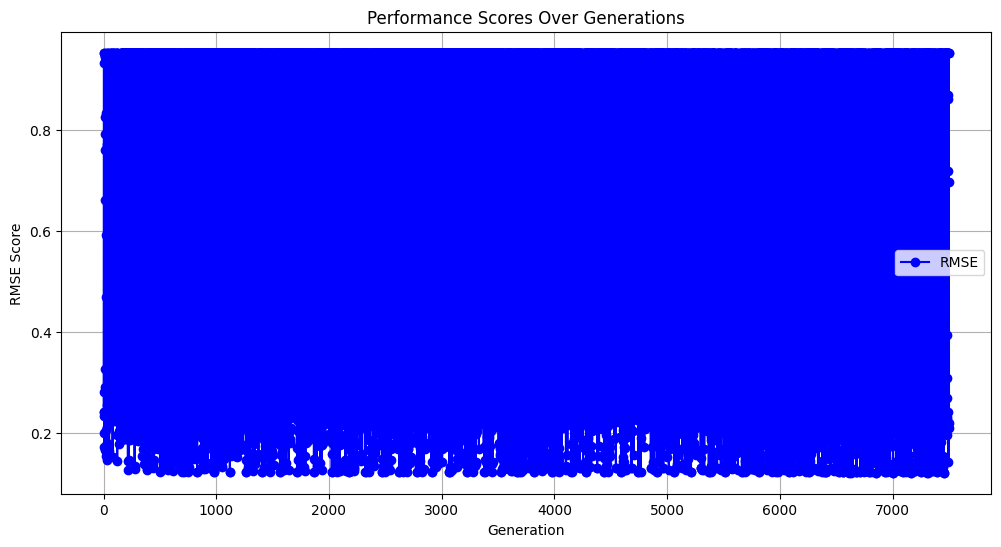

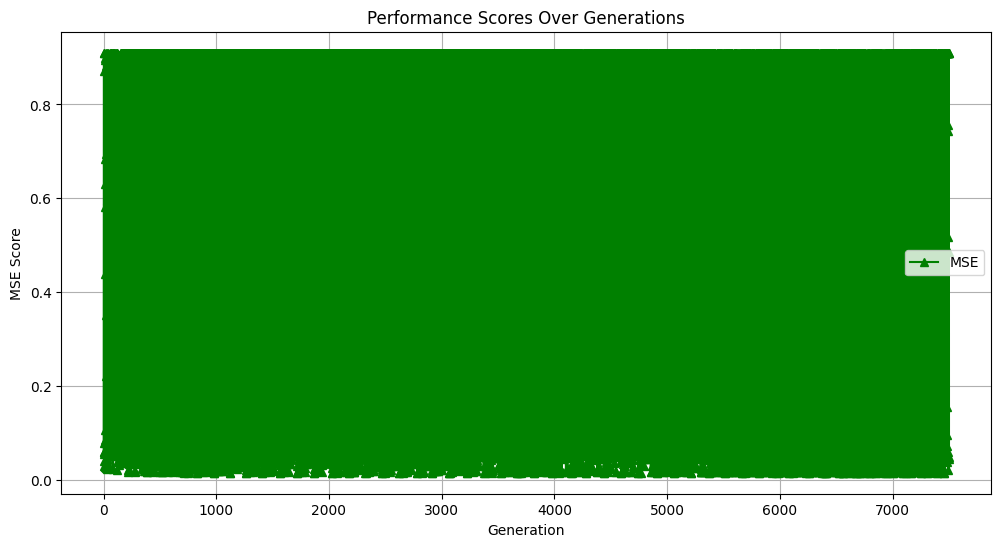

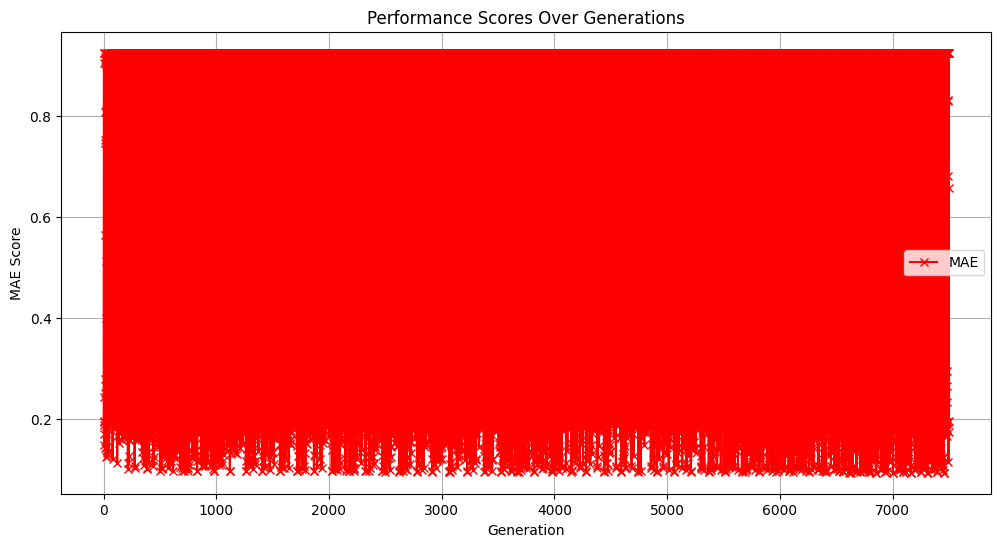

In [15]:

mse_values, mae_values, rmse_values = [], [], []

# Define your evaluation function using the loaded dataset
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        #predictions = np.array([net.activate(xi) for xi in X_train])
        predictions = []
        for xi in X_train:  # X_train should have a shape (n_samples, 10)
            output = net.activate(xi)  # xi needs to be an iterable of length 10
            predictions.append(output)
        predictions = np.array(predictions)
        mse = mean_squared_error(Y_train, predictions)
        mae = mean_absolute_error(Y_train, predictions)
        rmse = np.sqrt(mse)
                
        # Combining fitness metrics, you can customize this part
        genome.fitness = -mse  # NEAT works with a maximization problem
    
    mse_values.append(np.min(mse))
    mae_values.append(np.min(mae))
    rmse_values.append(np.min(rmse))


# Load the configuration
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction, neat.DefaultSpeciesSet, neat.DefaultStagnation, 'config_neat.txt')

# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(5))

# Run the experiment, pass eval_genomes function and number of generations
winner = p.run(eval_genomes, 50)

# Display the winning genome
print('\nBest genome:\n{!s}'.format(winner))

# Plotting the performance graph
plot_performance(rmse_values, mae_values, mse_values)
